# Network layer
- 它做什么：通过网络寻找路径
  - 从一个终端主机到另一个终端主机的路由
- 它不做什么:
  - 可靠的传输。"尽力而为的传递"
  - 保证路径
  - 交付的时间或顺序
  - 仲裁传输率
- 现在，把网络层看作是给我们提供了一个 "API"。有一个函数：sendtohost(data, host)
  - 承诺：数据将被送到那里（通常！！）
- 从发送主机到接收主机的传输段
  - 发送方：将网段封装成数据报，传递给链接层
  - 接收者：将网段传送到传输层协议
- 路由器
  - 检查通过它的所有IP数据报的头字段
  - 将数据报从输入端口移到输出端口，以沿端部路径传输数据报
- 网络层的功能:
  - forwarding: 将数据包从路由器的输入链路移至适当的路由器输出链路 
    - 转发表决定了该路由器的本地转发
  - routing: 确定数据包从源头到目的地的路线。
    - 路由算法决定了通过网络的终端路径

# data plane
- 本地、每台路由器的功能
- 决定如何将到达路由器输入端口的数据报转发到路由器输出端口

# control plane
- 整个网络的逻辑
- 决定数据报如何在路由器之间沿着从源主机到目的主机的终端路径进行路由。
- 每一个路由器中的单个路由算法组件在控制平面中相互作用
- 两种控制平面方法。
  - traditional routing algorithms, 在路由器中实现
  - software-defined networking（SDN), 在（远程）服务器中实现
    - 远程控制器计算，在路由器中安装转发表

## IP: Internet Protocol

# IP datagram format
- 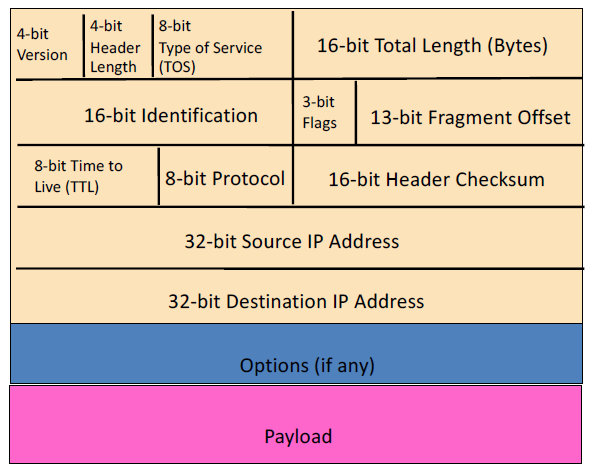
- `Version number` (4 bits)
  - 表示IP协议的版本
  - 有必要知道期待哪些其他字段
  - 通常是 "4"（对于IPv4）
  - 
- `Header length` (4 bits)
  - 报头中32位字的数量
  - 通常是 "5"（对于20字节的IPv4头）。
  - 当使用IP选项时可以更多
  - 
- `Total length` (16 bits)
  - 数据包中的字节数, 包括Header length
  - 最大尺寸为65,535字节（2^16-1）。
  - ...尽管链接层协议可能会施加更小的限制

- `Protocol` (8 bits)
  - Telling End-Host How to Handle Packet
  - 识别上级协议
  - 对接收主机的demultiplexing很重要

- `TLL`（8 bits）
  - Preventing Loops
  - 转发循环导致数据包循环很长时间, 随着这些数据的积累，最终会消耗掉所有的容量
  - TLL每一跳都会减少，如果达到0，数据包就会被丢弃,并向源头发送 "超时 "信息
  - 建议默认值为64

- `Header Checksum`（16 bits）
  - 只在数据包头上计算，方法与UDP/TCP校验和相同
  - 如果不正确，路由器会丢弃数据包
  - 因此，它不会对假信息采取行动
  - 在每个路由器上重新计算校验(include TTL)

- `Fragmentation Offset`（13 bits）
  - 网络链接有MTU（最大传输量）--最大可能的链接级帧
    - 不同的链接类型，不同的MTU
  - 大的IP数据报在网络中被分割（"碎片"）
    - 一个数据报变成几个数据报
    - 只有在最终目的地才 "重新组合"
    - IP头位用于识别和排列相关片段
  - 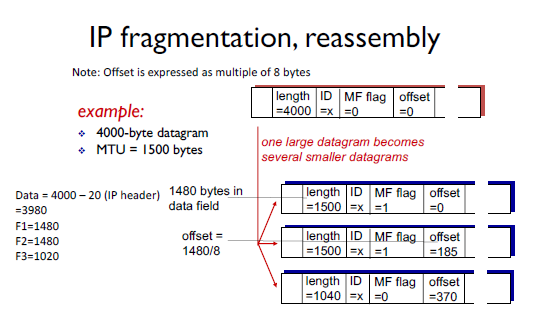

- `Type of Service` (8 bits)
  - Differentiated Services Code Point (DSCP)
  - 允许根据需要对数据包进行不同的处理
  - 例如，音频的低延迟，批量传输的高带宽
  - 已被重新定义过几次, 没有广泛使用

# fragmentation
- IPv4 fragmentation procedure
  - Fragmentation is harmful
  - Fragmentation
    - 路由器将数据报分割成输出链路所能支持的大小
    - 将IP头复制到碎片中
    - 调整碎片的长度
    - 设置偏移量以指示位置
    - 除最后一个片段外，在其他片段上设置MF（更多片段）标志
    - 重新计算校验和
  - 重新组装
    - 接收主机使用识别字段与MF和偏移量来完成数据报。

# IPv4 addressing
- IP地址。与每个主机或路由器接口相关的32位标识符
- 接口：主机/路由器和物理链接之间的连接
  - 路由器通常有多个接口
  - 主机通常有一个或两个接口（例如，有线以太网、无线802.11）。

- Network Mask
  - 与网络地址一起使用，表明网络部分使用了多少高阶位。

- Subnetting
  - 子网划分是将A类、B类或C类网络划分为更易于管理的小块，适合你的网络规模和结构的过程。
    - 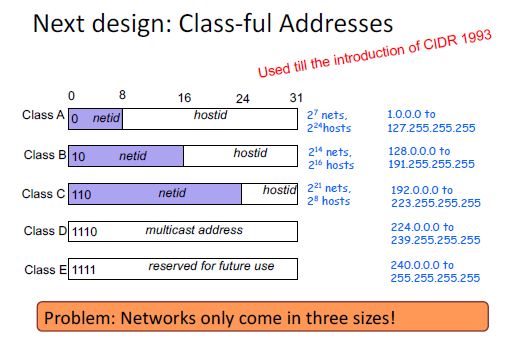
  - 子网划分允许3个层次的结构
  - netid、subnetid、hostid

- Classless InterDomain Routing (CIDR)
  - 地址的网络部分具有任意的长度
  - address format: `a.b.c.d/x`

- DHCP: Dynamic Host Configuration Protocol （DHCP）
  - 目标：主机在 "加入 "网络时，动态地从网络服务器获得IP地址
    - 可以在使用中的地址上续租
    - 允许重复使用地址（只在连接/开启时保留地址）
    - 支持加入/离开网络的移动用户
    - 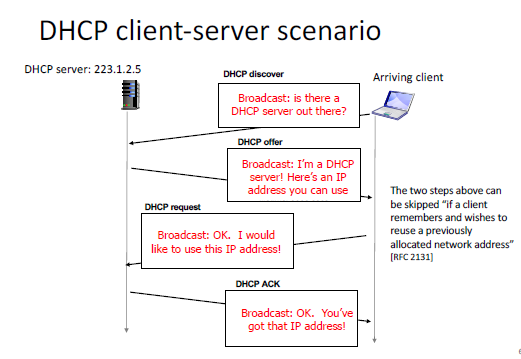
    - 连接笔记本电脑将使用DHCP来获得IP地址、第一跳路由器的地址、DNS服务器的地址。
      1. 用UDP封装的DHCP `REQUEST` 信息，用IP封装，用以太网封装
      2. 以太网帧在LAN(局域网)上广播（目的地：FFFFFFFFFFF），在运行DHCP服务器的路由器上收到
      3. 以太网解复用到IP解复用，UDP解复用到DHCP
      4. DCP服务器制定DHCP `ACK`，包含客户的IP地址、客户的第一跳路由器的IP地址、DNS服务器的名称和IP地址
      5. 封装的DHCP服务器回复被转发给客户，在客户处解复用为DHCP
      6. 客户端现在知道自己的IP地址、DNS服务器的名称和IP地址、第一跳路由器的IP地址。

- Route aggregation
  - 分层寻址允许有效地公布路由信息
  - 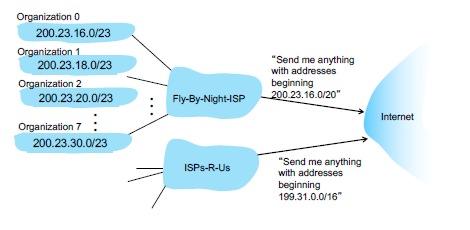
  - “Longest prefix matching”
    - 当为给定的目标地址寻找转发表项时，使用与目标地址匹配的最长的地址前缀。

# network address translation
# IPv6

# Generalized forwarding and Software Defined Networking (SDN)